In [ ]:
# https://medium.com/@rrfd/simple-automatic-feature-engineering-using-featuretools-in-python-for-classification-b1308040e183

In [13]:
%reload_ext autoreload
%autoreload 2

In [14]:
import sys; sys.path.append('scripts')
from common import *
from models import *
from visualization import *

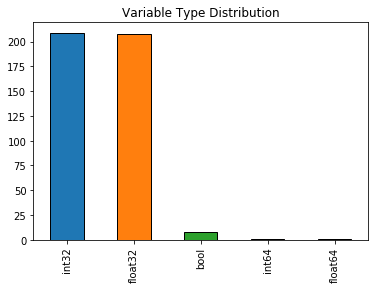

In [15]:
# train_df, test_df, columns_type_dict = load_data()
# train_df, test_df = remove_forbidden_columns(train_df, test_df)
# train_df.to_hdf('../data/train_processed.h5', key='train_df', mode='w')
# test_df.to_hdf('../data/test_processed.h5', key='test_df', mode='w')
train = pd.read_hdf('../data/train_processed.h5')
test = pd.read_hdf('../data/test_processed.h5')
with open('../data/features_dtypes.pkl', 'rb') as f:
    columns_type_dict = pickle.load(f)

train.dtypes.value_counts().plot.bar(edgecolor = 'k');
plt.title('Variable Type Distribution');


train_ = pd.read_csv('../data/train_enc.csv', usecols=['id', 'enc_anomaly'])
test_ = pd.read_csv('../data/test_enc.csv', usecols=['id', 'enc_anomaly'])

train = pd.merge(train, train_, on='id')
test = pd.merge(test, test_, on='id')

# train.drop(['enc_anomaly_y', 'enc_anomaly_x'], axis=1, inplace=True)
# test.drop(['enc_anomaly_y', 'enc_anomaly_x'], axis=1, inplace=True)

In [16]:
train['balance_sum'] = train.loc[(train['balance_sum']< 50) & (train['balance_sum'] > -25), 'balance_sum']
train['balance_sum'] = train['balance_sum'].fillna(train['balance_sum'].median())

test['balance_sum'] = test.loc[(test['balance_sum']< 50) & (test['balance_sum'] > -25), 'balance_sum']
test['balance_sum'] = test['balance_sum'].fillna(train['balance_sum'].median())

train['days_exp'] = train.loc[ train['days_exp']< 1000, 'days_exp' ]
train['days_exp'] = train['days_exp'].fillna(train['days_exp'].median())

test['days_exp'] = test.loc[(test['days_exp']< 1000), 'days_exp']
test['days_exp'] = test['days_exp'].fillna(train['days_exp'].median())

In [57]:
# # Загружает уже обработанные признаки 
# train_df = pd.read_hdf('../data/train_processed.h5')
# train_df['target'] = train_df['target'].astype('int')

# test_df = pd.read_hdf('../data/test_processed.h5')
# test_df.drop('target', axis=1, inplace=True)

# with open('../data/features_dtypes.pkl', 'rb') as f:
#     columns_type_dict = pickle.load(f)
    
# categorical_features = [
#     'os_category', 'device_type', 'service_7_flag_m1', 
#     'service_7_flag_m2', 'service_7_flag_m3', 
# ]

# binary_features = [
#     'tp_flag', 'block_flag', 'service_2_flag', 'is_obl_center', 
#     'is_my_vf', 'service_9_flag_m1', 'service_9_flag_m2', 
#     'service_9_flag_m3',
# ]

# # Заменить -1 на 999
# train_df[categorical_features] = train_df[categorical_features].apply(lambda x: x.replace(-1, 999))
# test_df[categorical_features] = test_df[categorical_features].apply(lambda x: x.replace(-1, 999))

# # Некоторые числовые признаки мы удалили из-за высокой корреляции
# # поэтому фильтруем те что были удалены
# numerical_features = [o for o in columns_type_dict['float_cols'] \
#                                if o in train_df.columns]

# embeded_features = pd.read_hdf('../data/embeded_features.h5')
# train_idx = train_df.index[-1]

# train_embeded_df = pd.concat([train_df, embeded_features.iloc[ :train_idx+1, : ]], axis=1)
# test_embeded_df = pd.concat([test_df, embeded_features.iloc[ train_idx+1:, : ].reset_index(drop=True)], axis=1)

# embede_features_names = [
# 'device_type',
#  'service_7_flag_m1',
#  'service_7_flag_m2',
#  'service_7_flag_m3',
#  'tp_flag',
#  'block_flag',
#  'service_2_flag',
#  'is_obl_center',
#  'is_my_vf',
#  'service_9_flag_m1',
#  'service_9_flag_m2',
#  'service_9_flag_m3',
# ]

# train_embeded_df.drop(embede_features_names, axis=1, inplace=True)
# test_embeded_df.drop(embede_features_names, axis=1, inplace=True)

In [40]:
# feature_matrix = pd.read_hdf('../data/float_important_featurestools.h5')

# drop_cols = []
# for col in feature_matrix:
#     if col == 'target':
#         pass
#     else:
#         if 'target' in col:
#             drop_cols.append(col)

# feature_matrix = feature_matrix[[x for x in feature_matrix if x not in drop_cols]]         

# with open('to_drop.pkl', 'rb') as f:
#     to_drop = pickle.load(f)
    
# feature_matrix = feature_matrix[[x for x in feature_matrix if x not in to_drop]]

# train_features = feature_matrix[feature_matrix['target'].notnull()].reset_index()
# test_features = feature_matrix[feature_matrix['target'].isnull()].reset_index()

# train_features.drop('target', axis=1, inplace=True)
# train_features.set_index('id', inplace=True)
# train.set_index('id', inplace=True)

# test_features.set_index('id', inplace=True)
# test.set_index('id', inplace=True)

# train_merged = pd.merge(train, train_features, on='id')
# test_merged = pd.merge(test, test_features, on='id')

# train_merged.reset_index(inplace=True)
# test_merged.reset_index(inplace=True)

In [19]:
# dev_idxs, valid_idxs, _, _ = train_test_split(
#     train.id.values,
#     train.target.values,
#     stratify=train.target.values,
#     test_size=0.2,
#     random_state=SEED,
#     )

In [11]:
lgb_params = {
    'nb_trees' : 1296,
    'bagging_fraction' : 0.853,
    'bagging_freq' : 3,
    'feature_fraction' : 0.801,
    'lambda_l1' : 6.0,
    'lambda_l2' : 5.52,
    'learning_rate' : 0.008,
    'max_bin' : 480,
    'min_data_in_leaf' : 197,
    'min_sum_hessian_in_leaf' : 2.438,
    'num_leaves' : 96,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'max_depth': -1,
    'verbose': -1,
    'num_threads': 10,
    'is_unbalance' : 'true',
}

In [12]:
# train.shape = (70000, 427), test.shape = (30000, 427)
# Fold 1/10*1
# Training until validation scores don't improve for 200 rounds.
# [100]	training's auc: 0.886013	valid_1's auc: 0.817907
# [200]	training's auc: 0.906489	valid_1's auc: 0.82384
# [300]	training's auc: 0.921947	valid_1's auc: 0.828262
# [400]	training's auc: 0.935478	valid_1's auc: 0.832263
# [500]	training's auc: 0.94728	valid_1's auc: 0.835455
# [600]	training's auc: 0.956851	valid_1's auc: 0.836975
# [700]	training's auc: 0.964977	valid_1's auc: 0.837965
# [800]	training's auc: 0.97179	valid_1's auc: 0.838607
# [900]	training's auc: 0.977277	valid_1's auc: 0.839408
# [1000]	training's auc: 0.981857	valid_1's auc: 0.840149
# [1100]	training's auc: 0.985481	valid_1's auc: 0.840376
# [1200]	training's auc: 0.988474	valid_1's auc: 0.840702
# [1300]	training's auc: 0.990874	valid_1's auc: 0.840735
# [1400]	training's auc: 0.992745	valid_1's auc: 0.840612
# Early stopping, best iteration is:
# [1219]	training's auc: 0.988977	valid_1's auc: 0.840802
    

# first fold starts - 0.817758; ends - 0.8396
# 10 auc: 0.8356075565031484
# auc = 0.835954 +/- 0.011032
preds = run_tree(lgb_params, train, test, folds=10, early_stop=250)

train.shape = (70000, 428), test.shape = (30000, 428)
Fold 1/10*1
Training until validation scores don't improve for 250 rounds.
[100]	training's auc: 0.884598	valid_1's auc: 0.812435
[200]	training's auc: 0.906106	valid_1's auc: 0.82087


KeyboardInterrupt: 

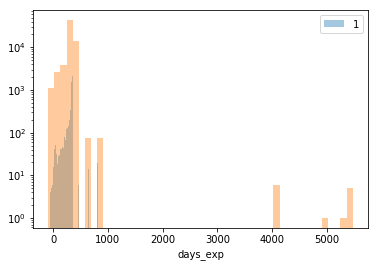

In [103]:
sns.distplot(train[train['target'] == 1]['days_exp'], kde=False, label='1');
sns.distplot(train[train['target'] == 0]['days_exp'], kde=False);
plt.yscale('log')
plt.legend();

In [115]:
train['days_exp'].describe()

count    70000.000000
mean       318.202114
std        101.459138
min        -87.000000
25%        324.000000
50%        345.000000
75%        356.000000
max       5470.000000
Name: days_exp, dtype: float64

In [109]:
train[['days_exp', 'target']].corr()

,days_exp,target
days_exp,1.000000,0.005473
target,0.005473,1.000000


In [122]:
train.loc[ (train['days_exp'] < 1000) ,  ['days_exp', 'target']].corr()

,days_exp,target
days_exp,1.000000,0.009805
target,0.009805,1.000000


In [132]:
train[['manufacturer_category', 'target']].corr()

,manufacturer_category,target
manufacturer_category,1.000000,0.001201
target,0.001201,1.000000


In [133]:
train['manufacturer_category'].describe()

count    70000.000000
mean       887.752029
std        490.614000
min          1.000000
25%        592.000000
50%        896.000000
75%       1057.000000
max       1836.000000
Name: manufacturer_category, dtype: float64

In [ ]:
# какие производители чаще всего у 0 и 1.
pd.crosstab(train['target'], train['manufacturer_category']).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65f0df63c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65ea5772e8>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65ed2b0160>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6593eabf60>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb7415f8>, ...,
       ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb6c1f28>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65eb23d978>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65eae793c8>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65eab2cdd8>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f65ea7bf208>]], dtype=object)

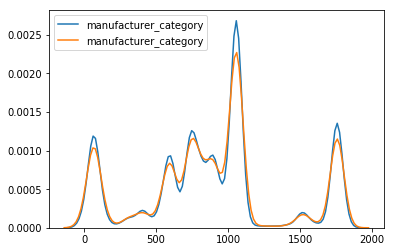

In [136]:
sns.kdeplot(train['manufacturer_category']);
sns.kdeplot(test['manufacturer_category']);

In [ ]:
sns.kdeplot(train[train['manufacturer_category'] == 1], 'manufacturer_category']);
sns.kdeplot(test['manufacturer_category']);

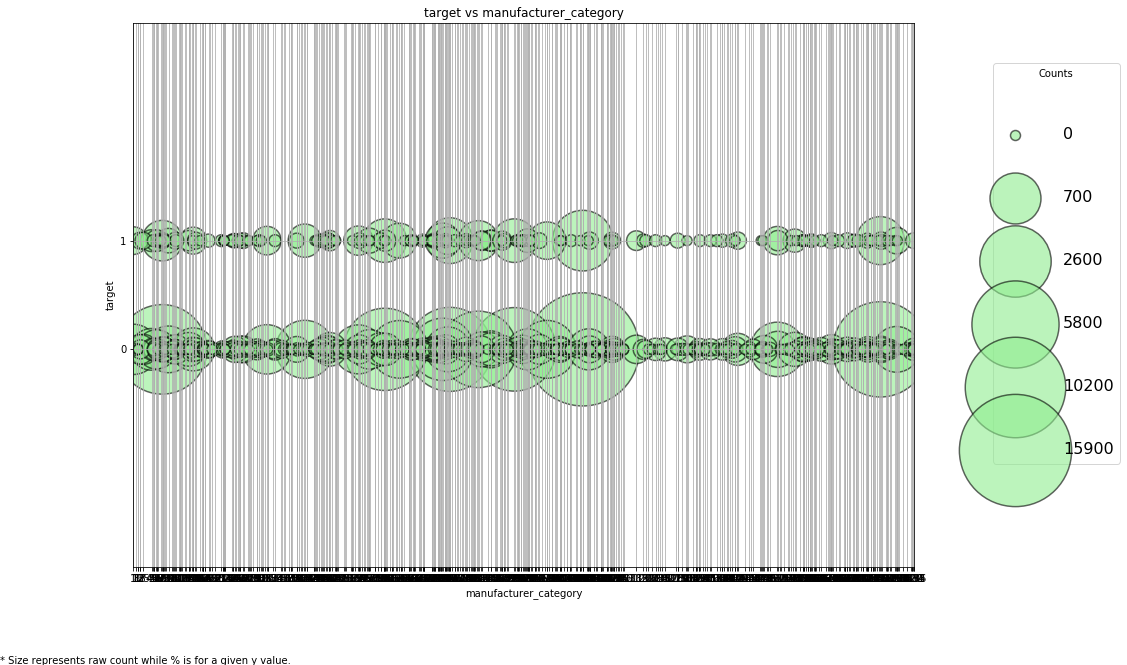

In [126]:
plot_categoricals('manufacturer_category', 'target', train, annotate=False)

In [51]:
train[['lt', 'target']].corr()

,lt,target
lt,1.000000,-0.186401
target,-0.186401,1.000000


In [84]:
np.corrcoef(np.exp(train['lt'] / 2 + 10 ).values, train['target'].values)

array([[ 1.      , -0.189053],
       [-0.189053,  1.      ]])

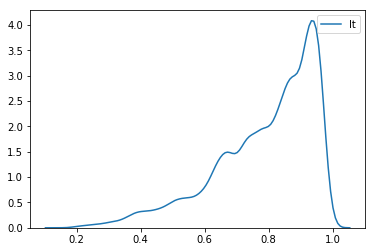

In [68]:
sns.kdeplot((train['lt']))

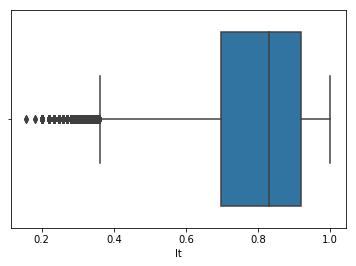

In [55]:
sns.boxplot(x=train['lt'])

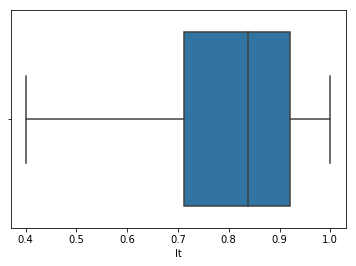

In [56]:
sns.boxplot(x=train.loc[(train['lt']> 0.4), 'lt'])

In [59]:
train.loc[(train['lt']> 0.4), ['lt', 'target']].corr()

,lt,target
lt,1.000000,-0.191469
target,-0.191469,1.000000


Не гонять кросс-валидацию на признаках, только уже в конце когда уперлись в потолок.

# Числовые признаки: 
Все чисовые значения причисленны к numeric. Но некоторые из них категориальные, а не порядковые.
Поэтому первый раз попробуем сгенерить признаки только для числовых переменных. Для порядковых имеет смысл считать среднее, медиану, мин, макс, а для категориальных нет. Поэтому попробуем только для числовых признаков.

Результат. Скор упал до .81. Не сработало.

Обработка признаков занимает оченьмного времени. Поэтому взять список важных признаков, и по ним сгенерировать новые признаки.

In [6]:
# Для генерации признаков нуэно объединить обуч. и тестовую выборки.
test['target'] = np.nan
data = pd.concat([train, test], axis=0)

# С помощью LightGBM  мы получил списко важных признаков, здесь мы его загружаем
with open('../data/important_features.pkl', 'rb') as f:
    important_features_columns = pickle.load(f)
    
# Теперь мы из общего кол-ва числовыхъ переменных фильтруем те, которые были удаленны.
# Потому что мы их тут тоже не будем использовать.
float_feat_with_removed_corr = [o for o in columns_type_dict['float_cols'] \
                               if o in data.columns]

# Тут мы выбирает из списка важные числовые признаки
important_float_features = [o for o in important_features_columns if o in float_feat_with_removed_corr]

print(f'В датасете всего - {data.shape[1]} признаков. \n\
Из которых - {len(float_feat_with_removed_corr)} числовых. \n\
Важных числовых признаков - {len(important_float_features)}.')

В датасете всего - 427 признаков. 
Из которых - 207 числовых. 
Важных числовых признаков - 40.


# Числовые признаки

In [7]:
es = ft.EntitySet(id = 'music')

es.entity_from_dataframe(
    entity_id='data', 
    dataframe=data[important_float_features + ['id', 'target']], 
    index='id',
)

Entityset: music
  Entities:
    data [Rows: 100000, Columns: 42]
  Relationships:
    No relationships

In [14]:
# Так можно посмотреть список все дефолтных примитивов
# ft.primitives.list_primitives()[ft.primitives.list_primitives().type == 'transform']

In [8]:
from featuretools.primitives import make_trans_primitive
from featuretools.variable_types import Numeric

def Log(column):
    return np.log(column + np.random.randint(10, 1000))

def Square_Root(column):
    return np.sqrt(column)

log_prim = make_trans_primitive(
    function=Log, input_types=[Numeric], return_type=Numeric)

square_root_prim = make_trans_primitive(
    function=Square_Root, input_types=[Numeric], return_type=Numeric)

# Так можно посмотреть список все дефолтных примитивов
# ft.primitives.list_primitives()[ft.primitives.list_primitives().type == 'transform']

# Примиты которые мы хотим использовать
trans_primitives = [
    'multiply', 'cum_mean', 'percentile',  'diff',
    ]

buffer = ['cum_max', 'divide', 'cum_min', 'mod',]

In [9]:
save_progress = '../data/ft_temp'
os.makedirs(save_progress, exist_ok=True)

In [10]:
%%time
feature_matrix, features = ft.dfs(entityset=es,
                                  target_entity="data",
                                  trans_primitives = [log_prim] + trans_primitives,
                                  verbose=True,
                                  chunk_size=4000, 
                                  max_depth=2,
                                  max_features=9000,
                                  n_jobs=1,
                                  save_progress=save_progress,
                                  )

Built 4305 features
Elapsed: 29:47 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 25/25 chunks
CPU times: user 47min 13s, sys: 6min 38s, total: 53min 52s
Wall time: 30min 15s


In [19]:
# Для уменьшения размера данных, изменим float64 -> float32. 
# Размер данных уменьшиться в два раза
n = 15
for o in tqdm_notebook(range(feature_matrix.shape[1] // n)):
    columns_batch = feature_matrix.iloc[:, o*n : (o*n)+n].columns
    feature_matrix[columns_batch] = feature_matrix[columns_batch].apply(lambda x: x.astype('float32'))

In [3]:
feature_matrix = pd.read_hdf('../data/float_important_featurestools.h5')
print(feature_matrix.info())
print(feature_matrix.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 482564054 to 48108709080
Columns: 4305 entries, lt to PERCENTILE(short_out_calls_part_m1 * voice_onnet_in_day_work_dur_m1)
dtypes: float32(4305)
memory usage: 1.6 GB
None
6150164


In [4]:
# Нужно удалить признаки в которых используется целевая переменная.
# Удаляем все признаки в которых встречается слово target. 
# Кроме самой цел.переменной.
drop_cols = []
for col in feature_matrix:
    if col == 'target':
        pass
    else:
        if 'target' in col:
            drop_cols.append(col)
            
print(drop_cols)            
feature_matrix = feature_matrix[[x for x in feature_matrix if x not in drop_cols]]         
feature_matrix.head(2)

['LOG(target)', 'com_num_cost_m3 * target', 'short_out_calls_part_m2 * target', 'short_in_calls_part_m2 * target', 'paym_el_sum_m3 * target', 'target * voice_all_in_dur_m3', 'com_num_cost_m1 * target', 'com_num_cost_m2 * target', 'paym_el_sum_m1 * target', 'short_in_calls_part_m1 * target', 'target * vol_app_7', 'conn_com_cost_m3 * target', 'short_out_calls_part_m3 * target', 'target * voice_all_in_dur_m1', 'target * voice_onnet_in_day_rest_dur_m2', 'paym_el_sum_m2 * target', 'target * voice_onnet_in_night_rest_dur_m2', 'data_type_3_m1 * target', 'conn_com_cost_m2 * target', 'target * voice_onnet_in_day_work_dur_m3', 'target * voice_onnet_in_night_work_dur_m3', 'all_cost_m2 * target', 'short_in_calls_part_m3 * target', 'target * voice_onnet_in_night_rest_dur_m1', 'target * voice_onnet_in_day_rest_dur_m1', 'balance_sum * target', 'lt * target', 'data_type_3_m3 * target', 'target * vol_app_4', 'target * vol_app_1', 'short_out_calls_part_m1 * target', 'data_type_2_m1 * target', 'data_type

,lt,balance_sum,data_type_3_m1,data_type_2_m1,data_type_3_m2,data_type_2_m2,data_type_3_m3,all_cost_m1,vol_app_4,vol_app_7,...,PERCENTILE(all_cost_m3 * paym_el_sum_m3),PERCENTILE(all_cost_m1 * paym_el_sum_m3),PERCENTILE(all_cost_m1 * data_type_3_m3),PERCENTILE(balance_sum * conn_com_cost_m2),PERCENTILE(voice_onnet_in_night_rest_dur_m1 * vol_app_7),PERCENTILE(all_cost_m3 * short_out_calls_part_m3),PERCENTILE(all_cost_m3 * vol_app_7),PERCENTILE(conn_com_cost_m2 * voice_onnet_in_night_work_dur_m1),PERCENTILE(voice_onnet_in_night_rest_dur_m1 * vol_app_1),PERCENTILE(short_out_calls_part_m1 * voice_onnet_in_day_work_dur_m1)
id,,,,,,,,,,,,,,,,,,,,,
482564054,0.937498,3.489069,12.132187,45.604485,7.955762,135.998047,40.636715,46.274502,133714.0,0.0,...,0.24404,0.262250,0.73948,0.27423,0.33509,0.65482,0.324705,0.359455,0.57348,0.82086
482567405,0.936257,34.233017,84.777473,528.861328,236.471649,2034.817749,16.421461,5.835300,12984499.0,0.0,...,0.52777,0.546205,0.60822,0.57507,0.33509,0.60723,0.324705,0.587700,0.72465,0.96284


In [5]:
# Разделяем на обучающую и тестовую выборка
train_features = feature_matrix[feature_matrix['target'].notnull()].reset_index()
test_features = feature_matrix[feature_matrix['target'].isnull()].reset_index()

In [6]:
# Для того чтобы посчитать матрицу ковариации сделаем случайную выборку из датасета
rest_idsx, subsample_idxs, _, _ = train_test_split(
    train_features.index.values,
    train_features.target.values,
    stratify=train_features.target.values,
    test_size=0.05,
    random_state=SEED,
    )

In [7]:
# Теперь уберем переменных которые коррелируют > 0.97
corr_matrix = feature_matrix.iloc[ subsample_idxs, : ].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.97)]
print('There are {} columns with >= 0.97 correlation.'.format(len(to_drop)))
to_drop

There are 1903 columns with >= 0.97 correlation.


['conn_com_cost_m2 * lt',
 'lt * short_out_calls_part_m2',
 'lt * vol_app_5',
 'data_type_3_m3 * lt',
 'lt * short_in_calls_part_m3',
 'data_type_3_m2 * lt',
 'all_cost_m1 * lt',
 'voice_all_in_dur_m3 * voice_onnet_in_day_rest_dur_m3',
 'lt * voice_onnet_in_night_rest_dur_m1',
 'com_num_cost_m2 * lt',
 'all_cost_m2 * lt',
 'lt * voice_onnet_in_night_work_dur_m3',
 'lt * voice_all_in_dur_m1',
 'lt * voice_onnet_in_day_work_dur_m1',
 'com_num_cost_m1 * lt',
 'data_type_2_m1 * lt',
 'lt * short_out_calls_part_m1',
 'voice_onnet_in_day_work_dur_m3 * voice_onnet_in_night_work_dur_m3',
 'lt * vol_app_1',
 'com_num_cost_m2 * vol_app_7',
 'voice_all_in_dur_m3 * voice_onnet_in_day_rest_dur_m1',
 'all_cost_m3 * com_num_cost_m2',
 'lt * paym_el_sum_m2',
 'voice_onnet_in_day_work_dur_m1 * vol_app_1',
 'com_num_cost_m2 * vol_app_1',
 'lt * voice_onnet_in_day_rest_dur_m2',
 'com_num_cost_m3 * data_type_2_m2',
 'com_num_cost_m1 * data_type_2_m2',
 'lt * paym_el_sum_m3',
 'com_num_cost_m3 * lt',
 'all

In [8]:
with open('to_drop.pkl', 'wb') as f:
    pickle.dump(to_drop, f)
    
# Удаляем признаки после первого раунда
feature_matrix = feature_matrix[[x for x in feature_matrix if x not in to_drop]]

In [10]:
feature_matrix.to_hdf('../data/float_important_features_without_corr.h5', key='feature_matrix')

In [13]:
# Разделяем на обучающую и тестовую выборка
train_features = feature_matrix[feature_matrix['target'].notnull()].reset_index()
test_features = feature_matrix[feature_matrix['target'].isnull()].reset_index()
train_features.head(2)

,id,lt,balance_sum,data_type_3_m1,data_type_2_m1,data_type_3_m2,data_type_2_m2,data_type_3_m3,all_cost_m1,vol_app_4,...,PERCENTILE(short_in_calls_part_m1 * short_out_calls_part_m3),PERCENTILE(short_in_calls_part_m1 * voice_onnet_in_day_rest_dur_m3),PERCENTILE(paym_el_sum_m2 * short_in_calls_part_m1),PERCENTILE(all_cost_m3 * paym_el_sum_m3),PERCENTILE(all_cost_m1 * paym_el_sum_m3),PERCENTILE(all_cost_m1 * data_type_3_m3),PERCENTILE(voice_onnet_in_night_rest_dur_m1 * vol_app_7),PERCENTILE(all_cost_m3 * short_out_calls_part_m3),PERCENTILE(all_cost_m3 * vol_app_7),PERCENTILE(voice_onnet_in_night_rest_dur_m1 * vol_app_1)
0,482564054,0.937498,3.489069,12.132187,45.604485,7.955762,135.998047,40.636715,46.274502,133714.0,...,0.80245,0.84017,0.30299,0.24404,0.262250,0.73948,0.33509,0.65482,0.324705,0.57348
1,482567405,0.936257,34.233017,84.777473,528.861328,236.471649,2034.817749,16.421461,5.835300,12984499.0,...,0.65662,0.95479,0.30299,0.52777,0.546205,0.60822,0.33509,0.60723,0.324705,0.72465


In [ ]:
# Посмотрим линейную корреляцию признаков с целевой переменной
corrs = train_features.corr()
corrs['target'].sort_values(ascending = False)

# Бинарные и категориальные 2:
Идея взять важные признаки, присвоить он нужный тип и сгенерировать по ним признаки.

In [ ]:
# Так можно посмотреть список все дефолтных примитивов
ft.primitives.list_primitives()[ft.primitives.list_primitives().type == 'transform']

In [ ]:
# Примиты которые мы хотим использовать
categorical_primitives = [isin, and, or]

In [ ]:
categorical_features = ['os_category', 'device_type', 'service_7_flag_m1', 
                       'service_7_flag_m2', 'service_7_flag_m3']

binary_features = ['tp_flag', 'block_flag', 'is_obl_center', 'is_my_vf']

binary_primitives = ['']

In [ ]:
# Make an entityset and add the entity
es = ft.EntitySet(id = 'music')

trip_variable_types = {
    'passenger_count': vtypes.Ordinal, 
    'vendor_id': vtypes.Categorical,
}

es.entity_from_dataframe(entity_id='data', 
                         dataframe=data[float_without_corr + ['id', 'target']], 
                         index='id',)
#                          variable_types=trip_variable_types)

# Сохранить dev/valid sets to the harddrive!